In [1]:
%pip install scipy
import re
from scipy import stats
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
def has_hashtags(text):
    if not isinstance(text, str):
        return False  # Return False for non-string values
    hashtag_pattern = re.compile(r'#\w+')
    hashtags = hashtag_pattern.findall(text)
    return bool(hashtags)

In [3]:
df = pd.read_csv('./data/combined_data.csv')

df.head()


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [4]:
df['contains_hashtags'] = df['caption'].apply(has_hashtags)

In [5]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,contains_hashtags
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,False
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True


In [6]:
mean_value = df["followers"].mean()
df["followers"] = df["followers"].fillna(mean_value)

In [7]:
df["followers"] = pd.to_numeric(df["followers"], errors='coerce')
df["likes"] = pd.to_numeric(df["likes"], errors='coerce')
df["comments"] = pd.to_numeric(df["likes"], errors='coerce')

In [8]:
df["engagement_rate"] = (((df["likes"]) + (df["comments"])) / df["followers"]) * 100

In [9]:
df.head(5)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,contains_hashtags,engagement_rate
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,16382.0,16382.0,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,False,1.527726
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,9267.0,9267.0,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True,0.864207
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,10100.0,10100.0,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True,0.941889
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,6943.0,6943.0,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True,0.647479
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,17158.0,17158.0,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,True,1.600093


In [10]:
fdf = df[['owner_id', 'contains_hashtags', 'engagement_rate']]

In [11]:
fdf.head(25)

,owner_id,contains_hashtags,engagement_rate
0,36063641,False,1.527726
1,36063641,True,0.864207
2,36063641,True,0.941889
3,36063641,True,0.647479
4,36063641,True,1.600093
5,36063641,True,0.903001
6,36063641,True,4.001257
7,36063641,True,0.399790
8,36063641,True,0.697931
9,36063641,True,4.525544


In [12]:
# Split the data into two groups based on the 'contains_hashtags' column
group_with_hashtags = fdf[fdf['contains_hashtags'] == True]['engagement_rate']
group_without_hashtags = fdf[fdf['contains_hashtags'] == False]['engagement_rate']

0      1.527726
12     0.251061
14     2.811885
24    12.206186
25    16.920271
Name: engagement_rate, dtype: float64

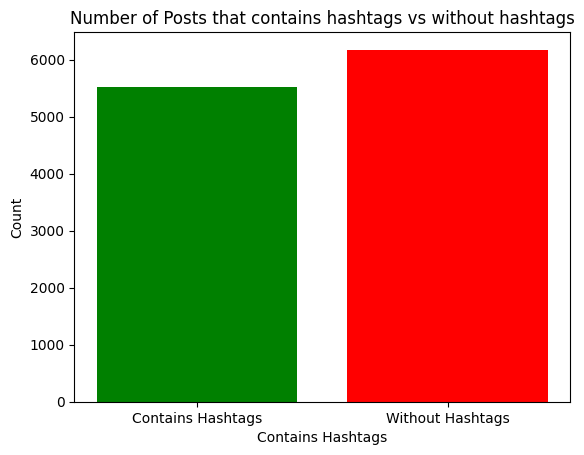

In [16]:
import matplotlib.pyplot as plt

# Count the number of True and False values
true_count = len(group_with_hashtags)
false_count = len(group_without_hashtags)

# Create a bar plot
labels = ['Contains Hashtags', 'Without Hashtags']
values = [true_count, false_count]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Contains Hashtags')
plt.ylabel('Count')
plt.title('Number of Posts that contains hashtags vs without hashtags')
plt.show()


In [ ]:
group_with_hashtags.dropna(inplace=True)
group_without_hashtags.dropna(inplace=True)

/var/folders/3s/32scystj4hv3y38g0hczwmyw0000gn/T/ipykernel_56161/2345460172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_with_hashtags.dropna(inplace=True)
/var/folders/3s/32scystj4hv3y38g0hczwmyw0000gn/T/ipykernel_56161/2345460172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_without_hashtags.dropna(inplace=True)


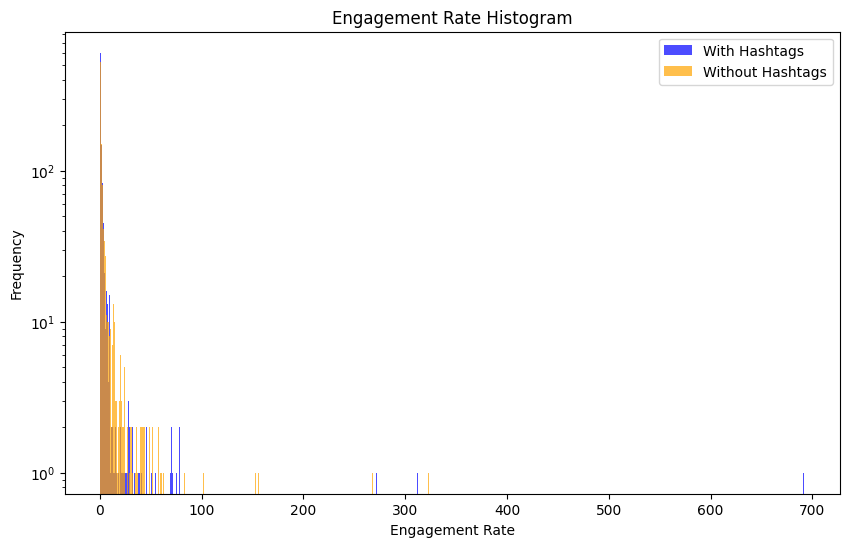

In [28]:
import numpy as np
h = group_with_hashtags.sample(n=1000, random_state=142)
n = group_without_hashtags.sample(n=1000, random_state=142)

plt.figure(figsize=(10, 6))

plt.hist(h, bins=np.arange(min(h), max(h) + 1, 1), alpha=0.7, color='blue', label='With Hashtags', log=True)
plt.hist(n, bins=np.arange(min(n), max(n) + 1, 1), alpha=0.7, color='orange', label='Without Hashtags', log=True)

plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.title('Engagement Rate Histogram')
plt.legend()
plt.show()

In [ ]:



t_stat, p_value = stats.ttest_ind(h, n, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in engagement rates.")
else:
    print("Fail to reject the null hypothesis. No significant difference in engagement rates.")

T-statistic: -1.2215880815781215
P-value: 0.2220088337436301
Fail to reject the null hypothesis. No significant difference in engagement rates.
